In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.utils import plot_model
from IPython.display import display
from PIL import Image

Using TensorFlow backend.


In [55]:
##https://machinelearningmastery.com/keras-functional-api-deep-learning/
visible = Input(shape=(7,))
hidden1 = Dense(14, activation='sigmoid')(visible)
#hidden2 = Dense(7, activation='sigmoid')(hidden1)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 8         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


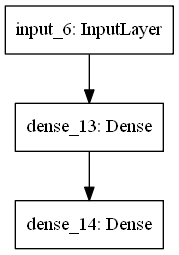

In [56]:
display(Image.open('multilayer_perceptron_graph.png'))

In [57]:
x = np.array([[0, 1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1, 0],
                     [1, 2, 3, 4, 5, 6, 7],[7, 6, 5, 4, 3, 2, 1],
                     [2, 3, 4, 5, 6, 7, 8],[8, 7, 6, 5, 4, 3, 2],
                     [3, 4, 5, 6, 7, 8, 9],[9, 8, 7, 6, 5, 4, 3],
                     [4, 5, 6, 7, 8, 9, 10],[10, 9, 8, 7, 6, 5, 4],
                     [5, 6, 7, 8, 9, 10, 11],[11, 10, 9, 8, 7, 6, 5],
                     [6, 7, 8, 9, 10, 11, 12],[12, 11, 10, 9, 8, 7, 6]])
y = np.array([[1], [0], [1], [0],[1], [0], [1], 
                     [1], [0], [1], [0],[1], [0], [1]])

In [58]:
#https://keras.io/optimizers/
sgd = 'sgd' #optimizers.SGD(lr=0.1, clipnorm=1.) #'sgd' #
model.compile(loss='binary_crossentropy'            
            , optimizer=sgd
            , metrics=['accuracy']) 

In [59]:
history = model.fit(x, y 
                    , epochs=1000 
                    , batch_size=10 # Number of observations per batch 
                    , verbose=0 # No output 
                   )

In [60]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 4ms/step
Accuracy: 50.00


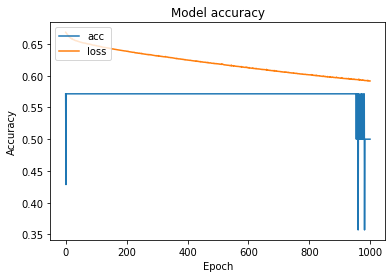

In [61]:
import matplotlib.pyplot as plt

#print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [62]:
test = np.array([[0, 1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1, 0],[1, 2, 3, 4, 5, 6, 7],[7, 6, 5, 4, 3, 2, 1]])
predictions = model.predict(test)
rounded = [x for x in predictions]

for i in range(len(rounded)):
    print('predict',rounded[i])
    print('%s => %d (expected %d)' % (x[i].tolist(), np.round(rounded[i]), y[i]))

predict [0.8041501]
[0, 1, 2, 3, 4, 5, 6] => 1 (expected 1)
predict [0.49897474]
[6, 5, 4, 3, 2, 1, 0] => 0 (expected 0)
predict [0.7891049]
[1, 2, 3, 4, 5, 6, 7] => 1 (expected 1)
predict [0.49897233]
[7, 6, 5, 4, 3, 2, 1] => 0 (expected 0)


In [63]:
test = np.array([[ 1, 2, 3, 4, 5, 6, 7 ],[ 1, 2, 3, 4, 5, 4, 3 ],[ 1, 2, 3, 4, 3, 2, 2 ],[ 1, 2, 3, 2, 1, 0, 1 ]])
predictions = model.predict(test)
rounded = [x for x in predictions]

for i in range(len(rounded)):
    print('predict',rounded[i])
    print('%s => %d' % (test[i].tolist(), np.round(rounded[i])))

predict [0.7891049]
[1, 2, 3, 4, 5, 6, 7] => 1
predict [0.64322555]
[1, 2, 3, 4, 5, 4, 3] => 1
predict [0.5417717]
[1, 2, 3, 4, 3, 2, 2] => 1
predict [0.50791353]
[1, 2, 3, 2, 1, 0, 1] => 1
